In [1]:
import keras
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [2]:
class load_file:
    def __init__(self, file):
        self.file = file

    def get_data(self):
        hal = np.load(self.file)
        X_train, y_train, X_test, y_test,X_val, y_val = [hal[f] for f in hal.files]
        return X_train, y_train, X_test, y_test,X_val, y_val 
    
df = load_file('halloween_classes.npz')
X_train, y_train, X_test, y_test,X_val, y_val  = df.get_data()


In [3]:
#Now that we have our dataset in our dispose, we have to shuffle our dataset

#Lets first shuffle our training data
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train= X_train[indices]
y_train = y_train[indices]


# Now our testing data
test_indices = np.arange(X_test.shape[0])

np.random.shuffle(test_indices)
X_test= X_test[test_indices]
y_test = y_test[test_indices]



val_indices = np.arange(X_val.shape[0])
np.random.shuffle(val_indices)
X_val = X_val[val_indices]
y_val = y_val[val_indices]

In [4]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization 
from keras import backend as K
from sklearn import preprocessing
from keras.utils import to_categorical
from keras import regularizers


In [5]:
input_shape = (50,50,3)
kernel_size = (3,3)
batch_size = 15
epochs = 100

In [6]:
cnn4 = Sequential()

In [7]:
cnn4.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())  
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.50))


cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.60))


cnn4.add(Flatten())

cnn4.add(Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.6))

cnn4.add(Dense(1, activation='sigmoid'))

In [8]:
cnn4.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


train_datagen = ImageDataGenerator( 
                        rescale=0.0/255
                        )
train_generator = train_datagen.flow(x=X_train, 
                                     y=y_train, 
                                     batch_size=batch_size)


history = cnn4.fit_generator(train_generator, 
                             validation_data=(X_val,y_val),
                             steps_per_epoch=len(X_train)//batch_size, 
                             epochs=epochs
                            )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
230/230 [==============================] - 64s 279ms/step - loss: 1.4446 - accuracy: 0.5994 - val_loss: 1.1276 - val_accuracy: 0.6787
Epoch 2/100
230/230 [==============================] - 65s 283ms/step - loss: 1.1827 - accuracy: 0.6585 - val_loss: 0.9889 - val_accuracy: 0.7362
Epoch 3/100
230/230 [==============================] - 68s 294ms/step - loss: 1.0058 - accuracy: 0.6672 - val_loss: 0.8918 - val_accuracy: 0.6936
Epoch 4/100
230/230 [==============================] - 56s 243ms/step - loss: 0.8793 - accuracy: 0.6902 - val_loss: 0.8503 - val_accuracy: 0.6702
Epoch 5/100
230/230 [==============================] - 56s 244ms/step - loss: 0.8176 - accuracy: 0.6870 - val_loss: 0.8817 - val_accuracy: 0.6000
Epoch 6/100
230/230 [==============================] - 64s 280ms/step - loss: 0.7620 - accuracy: 0.7084 - val_loss: 0.9377 - val_accuracy: 0.6362
Epoch 7/100
230/230 [========

230/230 [==============================] - 54s 234ms/step - loss: 0.6740 - accuracy: 0.7949 - val_loss: 0.6941 - val_accuracy: 0.7745
Epoch 54/100
230/230 [==============================] - 54s 234ms/step - loss: 0.6846 - accuracy: 0.7971 - val_loss: 0.7089 - val_accuracy: 0.7745
Epoch 55/100
230/230 [==============================] - 54s 233ms/step - loss: 0.6548 - accuracy: 0.8031 - val_loss: 0.9025 - val_accuracy: 0.5851
Epoch 56/100
230/230 [==============================] - 54s 234ms/step - loss: 0.6922 - accuracy: 0.7878 - val_loss: 0.6963 - val_accuracy: 0.8021
Epoch 57/100
230/230 [==============================] - 54s 233ms/step - loss: 0.6599 - accuracy: 0.8008 - val_loss: 0.9014 - val_accuracy: 0.6191
Epoch 58/100
230/230 [==============================] - 54s 234ms/step - loss: 0.6772 - accuracy: 0.8046 - val_loss: 0.7205 - val_accuracy: 0.7787
Epoch 59/100
230/230 [==============================] - 62s 270ms/step - loss: 0.6939 - accuracy: 0.7843 - val_loss: 0.7260 - val_a

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


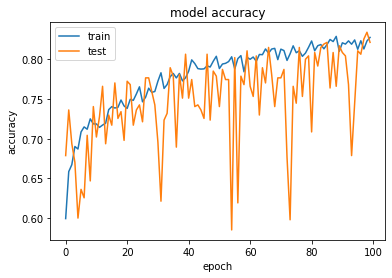

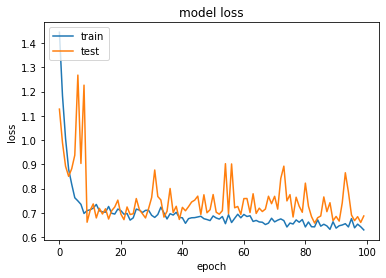

In [11]:
import matplotlib.pyplot as plt




# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
cnn4.save("Halloween_model_edition_80.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
loss,acc = cnn4.evaluate(X_test, y_test, batch_size=batch_size)

print("Results:\nERROR LOSS:{}\nACC: {}%".format(loss, round(acc*100)))

1671/1671 [==============================] - 9s 5ms/step
Results:
ERROR LOSS:0.7226226868599492
ACC: 80%


In [27]:
rounded_predictions = cnn4.predict_classes(X_test, batch_size=batch_size, verbose=0)

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
from sklearn.metrics import confusion_matrix
matrix =confusion_matrix(y_test, rounded_predictions)
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]


ERR =  (FP + FN) / (FP + FN + TP + TN)
PRE = (TP)/(TP+FP)
REC = (TP)/(TP+FN)
F1 = 2*(PRE*REC)/(PRE+REC)

print("\nERROR: {}\nPrecision: {}\nRecall: {}\nF1: {}".format(ERR, PRE, REC, F1))


ERROR: 0.1992818671454219
Precision: 0.8882175226586103
Recall: 0.6942148760330579
F1: 0.779324055666004


Confusion matrix, without normalization
[[750  74]
 [259 588]]


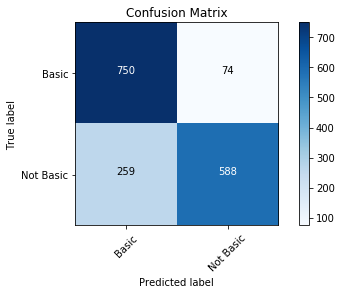

In [33]:
import itertools 
labels = ['Basic', 'Not Basic']
plot_confusion_matrix(matrix, labels, title='Confusion Matrix')